# Histograms, Binnings, and Density

A simple histogram can be a great first step in understanding a dataset.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

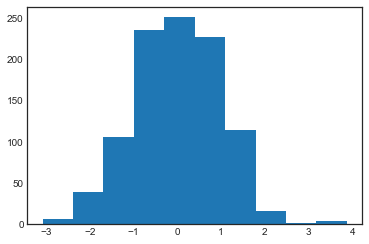

In [2]:
plt.hist(data);

The ``hist()`` function has many options to tune both the calculation and the display; 
here's an example of a more customized histogram:

C:\Users\ku.kulshrestha\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.00430775, 0.00430775, 0.02153874, 0.02584648, 0.03446198,
        0.10769368, 0.1464634 , 0.11200143, 0.19815637, 0.28000357,
        0.33600428, 0.39631274, 0.32308104, 0.40492824, 0.35323527,
        0.39200499, 0.33600428, 0.24984934, 0.19384862, 0.19384862,
        0.10338593, 0.05169297, 0.01292324, 0.00430775, 0.        ,
        0.00430775, 0.        , 0.        , 0.00861549, 0.00861549]),
 array([-3.085486 , -2.8533461, -2.6212062, -2.3890663, -2.1569264,
        -1.9247865, -1.6926466, -1.4605067, -1.2283668, -0.9962269,
        -0.764087 , -0.5319471, -0.2998072, -0.0676673,  0.1644726,
         0.3966125,  0.6287524,  0.8608923,  1.0930322,  1.3251721,
         1.557312 ,  1.7894519,  2.0215918,  2.2537317,  2.4858716,
         2.7180115,  2.9501514,  3.1822913,  3.4144312,  3.6465711,
         3.878711 ]),
 <a list of 1 Patch objects>)

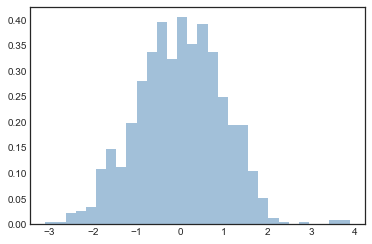

In [7]:
plt.hist(data, bins=30, normed=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none')

Different parameters available for hist function and their meanings:

* **bins ** : int or sequence or str, if bins is a sequence, gives bin edges, including left edge of first bin and right edge of last bin. All but the last (righthand-most) bin is half-open. In other words, if bins is:

[1, 2, 3, 4]
then the first bin is [1, 2) (including 1, but excluding 2) and the second [2, 3). The last bin, however, is [3, 4], which includes 4.

* **density **: If True, the first element of the return tuple will be the counts normalized to form a probability density, i.e., the area (or integral) under the histogram will sum to 1

* **alpha**: Represents the transparency of the blocks

* **histtype**: {'bar', 'barstacked', 'step', 'stepfilled'}, optional
The type of histogram to draw. Default is 'bar'

    * 'bar' is a traditional bar-type histogram. If multiple data are given the bars are arranged side by side.
    * 'barstacked' is a bar-type histogram where multiple data are stacked on top of each other.
    * 'step' generates a lineplot that is by default unfilled.
    * 'stepfilled' generates a lineplot that is by default filled.

* **color**: Color to be used

* **edgecolor**: Color to be used as outline of the histogram.

The ``plt.hist`` docstring has more information on other customization options available.
This combination of ``histtype='stepfilled'`` along with some transparency ``alpha`` to be very useful when comparing histograms of several distributions:

C:\Users\ku.kulshrestha\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


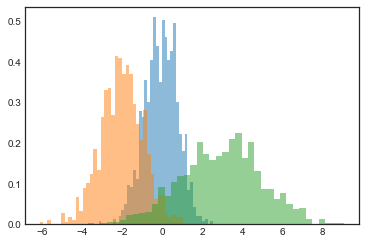

In [10]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.5, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the ``np.histogram()`` function is available:

In [13]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 46 341 478 130   5]


## Two-Dimensional Histograms and Binnings

Just as we create histograms in one dimension by dividing the number-line into bins, we can also create histograms in two-dimensions by dividing points among two-dimensional bins.
We'll take a brief look at several ways to do this here.
We'll start by defining some data—an ``x`` and ``y`` array drawn from a multivariate Gaussian distribution:

In [14]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### ``plt.hist2d``: Two-dimensional histogram

One straightforward way to plot a two-dimensional histogram is to use Matplotlib's ``plt.hist2d`` function:

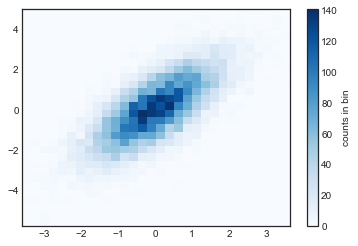

In [15]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

Just as with ``plt.hist``, ``plt.hist2d`` has a number of extra options to fine-tune the plot and the binning, which are nicely outlined in the function docstring.
Further, just as ``plt.hist`` has a counterpart in ``np.histogram``, ``plt.hist2d`` has a counterpart in ``np.histogram2d``, which can be used as follows:

In [16]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

For the generalization of this histogram binning in dimensions higher than two, see the ``np.histogramdd`` function.

### ``plt.hexbin``: Hexagonal binnings

The two-dimensional histogram creates a tesselation of squares across the axes.
Another natural shape for such a tesselation is the regular hexagon.
For this purpose, Matplotlib provides the ``plt.hexbin`` routine, which will represents a two-dimensional dataset binned within a grid of hexagons:

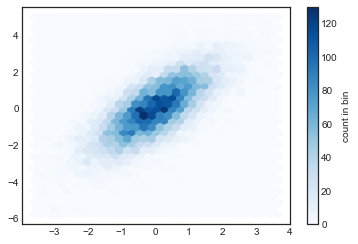

In [17]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

``plt.hexbin`` has a number of interesting options, including the ability to specify weights for each point, and to change the output in each bin to any NumPy aggregate (mean of weights, standard deviation of weights, etc.).

### Kernel density estimation

Another common method of evaluating densities in multiple dimensions is *kernel density estimation* (KDE).
One extremely quick and simple KDE implementation exists in the ``scipy.stats`` package.
Here is a quick example of using the KDE on this data:

[[ 1.08373219 -1.01588106  0.45873752 ... -0.20005605 -0.04627678
  -1.10249702]
 [ 1.654163   -1.947606    0.71533698 ...  0.63962665  0.13889402
  -2.00539913]]


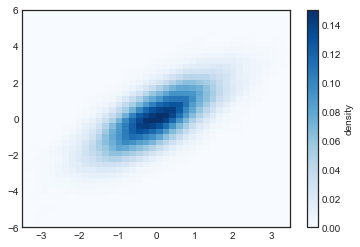

In [19]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
print(data)
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

KDE has a smoothing length that effectively slides the knob between detail and smoothness (one example of the ubiquitous bias–variance trade-off).
The literature on choosing an appropriate smoothing length is vast: ``gaussian_kde`` uses a rule-of-thumb to attempt to find a nearly optimal smoothing length for the input data.

Other KDE implementations are available within the SciPy ecosystem, each with its own strengths and weaknesses; see, for example, ``sklearn.neighbors.KernelDensity`` and ``statsmodels.nonparametric.kernel_density.KDEMultivariate``.
For visualizations based on KDE, using Matplotlib tends to be overly verbose.
The Seaborn library, discussed in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb), provides a much more terse API for creating KDE-based visualizations.

<!--NAVIGATION-->
< [Density and Contour Plots](04.04-Density-and-Contour-Plots.ipynb) | [Contents](Index.ipynb) | [Customizing Plot Legends](04.06-Customizing-Legends.ipynb) >